Name:

Student ID:

**Answer the questions and/or write your code**

Create a text/code section after each question to answer

**Dataset Info**



1.   Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]



**Imports**

In [188]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


In [189]:
def pdisplay(df , columns = None , title = None):
    if isinstance(df , pd.DataFrame):
        display(df)
    if columns is None:
        display(pd.DataFrame(df))
    else:
        display(pd.DataFrame(df , columns = columns).rename_axis(title))

**Ques-01: Import the dataset and display the top 8 rows**

In [190]:
# import any library that is required

#Inside the random state, put last 3 digits of your student ID
#Example: For ID 160021456, random_state= 456
data= pd.read_csv('../data/heart.csv')
data, test = train_test_split(data, test_size=0.1, random_state= 456)
# 'data' now contains the dataframe you are going to work with. Write the code to display top 8 rows of the dataframe:
data.head(8)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
55,51,F,ATA,160,194,0,Normal,170,N,0.0,Up,0
861,65,M,ASY,110,248,0,LVH,158,N,0.6,Up,1
549,68,M,TA,139,181,1,ST,135,N,0.2,Up,0
517,65,M,ASY,150,235,0,Normal,120,Y,1.5,Flat,1
512,35,M,NAP,123,161,0,ST,153,N,-0.1,Up,0
19,36,M,ATA,120,267,0,Normal,160,N,3.0,Flat,1
617,57,M,ATA,124,261,0,Normal,141,N,0.3,Up,1
454,58,M,ASY,136,203,1,Normal,123,Y,1.2,Flat,1


**Ques-02: How many patients info is there in the data?**

**Ques-03: How many attributes does the data contain?**

**Ques-04: How many categorical and numerical attributes are present in the data?**

In [191]:
# Ans 02
print( "Number of patients info:", data.shape[0] )

Number of patients info: 826


In [192]:
# Ans 03
pdisplay(data.dtypes , ["Col dtypes"] , "Features")

,Col dtypes
Features,
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object


In [193]:
# Ans 04
object_idx = data.dtypes[data.dtypes == 'object'].index
numeric_idx = data.dtypes[data.dtypes != 'object'].index

print(f"Object columns: {object_idx.shape[0]}\n", object_idx.values)
print(f"Numeric columns: {numeric_idx.shape[0]}\n", numeric_idx.values)

Object columns: 5
 ['Sex' 'ChestPainType' 'RestingECG' 'ExerciseAngina' 'ST_Slope']
Numeric columns: 7
 ['Age' 'RestingBP' 'Cholesterol' 'FastingBS' 'MaxHR' 'Oldpeak'
 'HeartDisease']


**Ques-05: Write a code to determine number of heart disease positive and negative cases in the data.**

In [194]:
# Ans 05
heart_disease_count = (data['HeartDisease'] == 1).sum()

print(f"heart disease positive: {heart_disease_count}")
print(f"heart disease negative: {data.shape[0] - heart_disease_count}")

heart disease positive: 466
heart disease negative: 360


**Ques-06: What is the standard deviation of the cholestorol level in the dataset?**

**Ques-07: What is the most frequent type of chest pain?**

In [195]:
# Ans 06
sd = data['Cholesterol'].describe()['std']
print(f"Cholesterol standard deviation: {sd}")

Cholesterol standard deviation: 110.66739014815576


In [196]:
# Ans 07
CPT = data['ChestPainType'].describe()['top']
print(f"Most frequent ChestPainType: \"{CPT}\"")

Most frequent ChestPainType: "ASY"


**Ques-08: Find the percentage of people who have heart disease with NAP type chest pain**

In [197]:
# Ans 08
count = (data['ChestPainType'] == 'NAP') & (data['HeartDisease'] == 1)
count = count.sum()
print(f"Percentage of NAP patients with heart disease: {count/data.shape[0]*100:0.2f}%")


Percentage of NAP patients with heart disease: 8.11%


**Ques-09: plot Age wise histogram  for all genders combined with target variable**

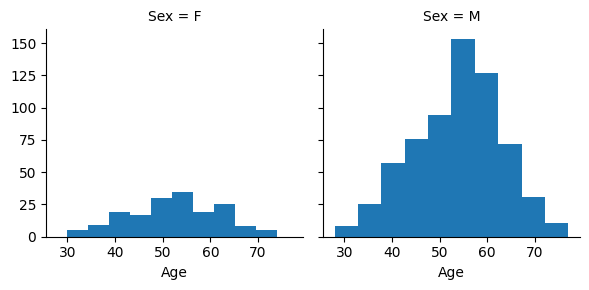

In [198]:
# Ans 09
# pairplot for age & sex
g = sns.FacetGrid(data, col="Sex")
g.map(plt.hist, "Age")
plt.show()

**Ques - 11: How many missing entries in the data?**

**Ques - 12: Write a code to impute all missing values with appropriate strategy**

In [199]:
# Ans 11
missing_no = data.isnull().sum()
print("Number of missing values:\n")
pdisplay(missing_no)

Number of missing values:



,0
Age,0
Sex,0
ChestPainType,1
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,1
Oldpeak,0


In [200]:
# Ans 12
# convert categorical data to numeric
# numerate categorical data
for col in object_idx:
    objs = data[col].value_counts().index.values
    mapping = dict( zip( objs , range(1, len(objs)+1 ) ))
    print( mapping )
    data[col] = (data[col].map(mapping))
    # break;


{'M': 1, 'F': 2}
{'ASY': 1, 'NAP': 2, 'ATA': 3, 'TA': 4}
{'Normal': 1, 'LVH': 2, 'ST': 3}
{'N': 1, 'Y': 2}
{'Flat': 1, 'Up': 2, 'Down': 3}


In [201]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data_col = data.columns
data = imp.fit_transform(data)
data = pd.DataFrame(data , columns = data_col)
pdisplay(data.isnull().sum())



,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


**Ques - 13: What is the average age of the patients?**

**Ques - 14: "Older patients have more heart disease" - verify the statement.**

In [202]:
# Ans 13
print( "Average age:", data['Age'].mean() )

Average age: 53.554479418886196


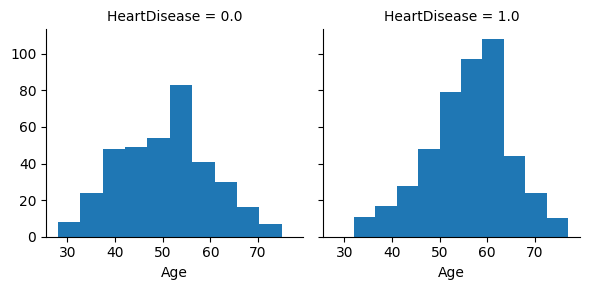

In [203]:
# Ans 14
g = sns.FacetGrid(data, col="HeartDisease")
g.map(plt.hist, "Age")
plt.show()

**Ques - 15: What is the least important attribute based on correletation?
 Write a code to drop that column**

<Axes: >

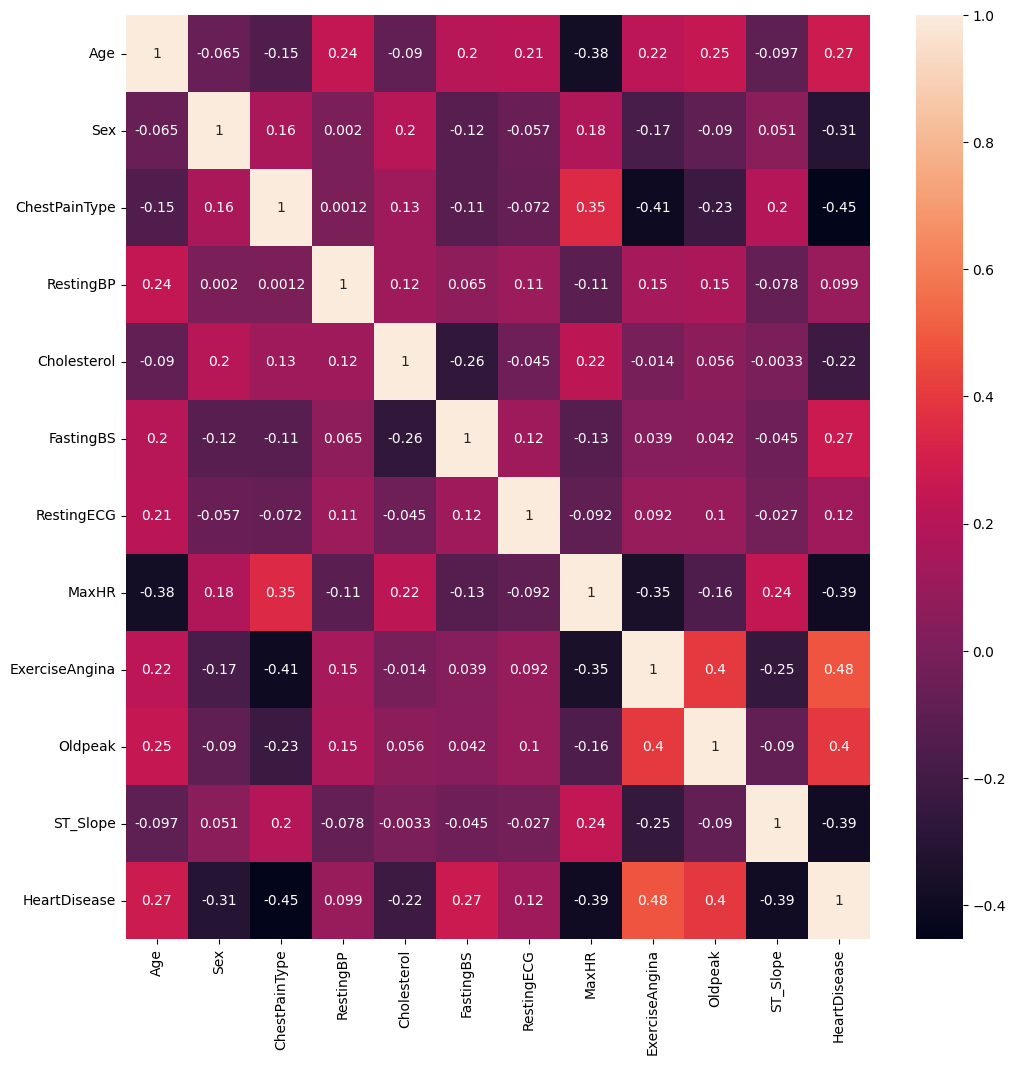

In [204]:
data_corr = data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(data_corr , annot=True)

In [205]:
np.fill_diagonal(data_corr.values, 0)
# data_corr
low_corr = (data_corr.abs() < 0.05).all()
col_drop = low_corr.index[low_corr.values]
data.drop( col_drop , axis=1 ).head()
# data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,51.0,2.0,3.0,160.0,194.0,0.0,1.0,170.0,1.0,0.0,2.0,0.0
1,65.0,1.0,1.0,110.0,248.0,0.0,2.0,158.0,1.0,0.6,2.0,1.0
2,68.0,1.0,4.0,139.0,181.0,1.0,3.0,135.0,1.0,0.2,2.0,0.0
3,65.0,1.0,1.0,150.0,235.0,0.0,1.0,120.0,2.0,1.5,1.0,1.0
4,35.0,1.0,2.0,123.0,161.0,0.0,3.0,153.0,1.0,-0.1,2.0,0.0


**Ques - 16: Write a code to convert the ST_slope feature attribute from categorical to numerical.**

In [206]:
# Ans 16 
# already done in Ans 12

**Ques-17: Create a new column termed 'YYY' for the patients with 'Normal' restingECG. The values of the column will be the difference between their MaxHR and restingBP.**

**Create another column termed 'ZZZ'. If the values in the 'YYY' feature is > 0, then 'ZZZ' will have a feature value of 1, otherwise -1.**

In [207]:
# Ans 17
data['YYY'] = data['MaxHR'] - data['RestingBP']
data['ZZZ'] = 1*(data['YYY'] > 0) -1*(data['YYY'] <= 0) 
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,YYY,ZZZ
0,51.0,2.0,3.0,160.0,194.0,0.0,1.0,170.0,1.0,0.0,2.0,0.0,10.0,1
1,65.0,1.0,1.0,110.0,248.0,0.0,2.0,158.0,1.0,0.6,2.0,1.0,48.0,1
2,68.0,1.0,4.0,139.0,181.0,1.0,3.0,135.0,1.0,0.2,2.0,0.0,-4.0,-1
3,65.0,1.0,1.0,150.0,235.0,0.0,1.0,120.0,2.0,1.5,1.0,1.0,-30.0,-1
4,35.0,1.0,2.0,123.0,161.0,0.0,3.0,153.0,1.0,-0.1,2.0,0.0,30.0,1


Press ctrl+p or go to File->Print to convert the notebook file into a pdf. Submit both the notebook and pdf in google classroom.